In [1]:
import pandas as pd
from pathlib import Path

# Base de Dados a ser Analisada:

In [2]:
arquivo_excel = Path.cwd() / "Base_de_Dados.csv"

base_dados = pd.read_csv(arquivo_excel, sep=";", decimal=",", thousands=".")
base_dados.head(5)

,Data,Tipo,Meio de Pagamento,Instituição Bancária,Centro de Custo,Categoria,Descrição,Valor
0,01/01/2023,Receita,Conta Corrente,Banco do Brasil,João,Salário,Entrada de Salário do Mês,4500.0
1,01/02/2023,Receita,Conta Corrente,Banco do Brasil,João,Salário,Entrada de Salário do Mês,4500.0
2,01/03/2023,Receita,Conta Corrente,Banco do Brasil,João,Salário,Entrada de Salário do Mês,4500.0
3,01/04/2023,Receita,Conta Corrente,Banco do Brasil,João,Salário,Entrada de Salário do Mês,4500.0
4,01/05/2023,Receita,Conta Corrente,Banco do Brasil,João,Salário,Entrada de Salário do Mês,4500.0


### Qual foi o gasto do João no mês de maio do ano de 2023?

In [3]:
# Converti a coluna data para o formato data, assim posso trabalhar com ele
base_dados['Data'] = pd.to_datetime(base_dados['Data'], format='%d/%m/%Y')

# Criação das colunas mês e ano
base_dados['Mês'] = base_dados['Data'].dt.month
base_dados['Ano'] = base_dados['Data'].dt.year

# Aqui é o filtro para pegar o que eu quero
tabela_filtrada = base_dados[
    (base_dados["Mês"] == 5) & 
    (base_dados["Ano"] == 2023) &
    (base_dados["Centro de Custo"] == "João") &
    (base_dados["Tipo"] == "Despesa")]

#Aqui é feita a soma com os filtros formatado em reais (transformar em str e mudar o ponto para vírgula e vice versa)
f'R$ {tabela_filtrada["Valor"].sum():.2f}'

'R$ 3087.00'

### Qual o gasto por categoria no mês de fevereiro de 2023 do João?

In [4]:
# Aqui é o filtro para pegar o que eu quero
tabela_filtrada2 = base_dados[['Categoria','Valor']][
    (base_dados["Mês"] == 2) & 
    (base_dados["Ano"] == 2023) &
    (base_dados["Centro de Custo"] == "João") &
    (base_dados["Tipo"] == "Despesa")]

# Somei por categoria aqui e coloquei da maior à menor, definindo qual categoria é mais influente:
tabela_filtrada2 = tabela_filtrada2.groupby("Categoria").sum().sort_values("Valor", ascending=False)
tabela_filtrada2

,Valor
Categoria,
Habitação,462.0
Despesas Financeiras,430.5
Alimentação,409.5
Transportes,304.5
Profissional,252.0
Outras Despesas,157.5
Saúde,157.5
Lazer,21.0


In [5]:
import plotly.express as px

fig = px.bar(tabela_filtrada2.sort_values("Valor", ascending=True), x='Valor', orientation='h', title='Gastos por Categoria')

fig.show()

### Quanto foi a influencia de cada uma das categorias no total recebido de receita no mês de março de 2023 do João?

In [6]:
# Primeiro passo é filtrar o quanto o João ganhou no mês de março de 2023:
tabela_filtrada = base_dados[
    (base_dados["Mês"] == 5) & 
    (base_dados["Ano"] == 2023) &
    (base_dados["Centro de Custo"] == "João") &
    (base_dados["Tipo"] == "Receita")]

receita_apurada = tabela_filtrada['Valor'].sum()
receita_apurada

4500.0

In [7]:
# Primeiro passo é transformar a tabela em dicionário para que fique mais fácil iterar sobre ela:
dicionario = tabela_filtrada2["Valor"].to_dict()

# Depois eu crio um dicionário vazio para adicionar os elementos nele para transformar em tabela:
dict_to_table = {}

for chaves, valores in dicionario.items():
    valor_para_adicionar = f'{(valores / receita_apurada)*100:.2f}%'
    dict_to_table.update({chaves: valor_para_adicionar})


# Transformar o dicionário em tabela para adicionar a coluna com a porcentagem no item de cima:
dict_to_table


{'Habitação': '10.27%',
 'Despesas Financeiras': '9.57%',
 'Alimentação': '9.10%',
 'Transportes': '6.77%',
 'Profissional': '5.60%',
 'Outras Despesas': '3.50%',
 'Saúde': '3.50%',
 'Lazer': '0.47%'}

In [8]:
# Transformei o dado que estava em um dicionário em uma tabela:
tb = pd.DataFrame.from_dict(dict_to_table, orient='index', columns=['Percentual'])
tabela_filtrada2['(%)'] = tb['Percentual']
tabela_filtrada2

,Valor,(%)
Categoria,,
Habitação,462.0,10.27%
Despesas Financeiras,430.5,9.57%
Alimentação,409.5,9.10%
Transportes,304.5,6.77%
Profissional,252.0,5.60%
Outras Despesas,157.5,3.50%
Saúde,157.5,3.50%
Lazer,21.0,0.47%


### Os gastos ao longo de 2023 da maria estão diminuindo?

In [9]:
# Listar todos os gastos da Maria realizados em 2023:
lista_gastos_maria = []

for mes in range (1,13):

    tabela_filtrada = base_dados[
        (base_dados["Mês"] == mes) & 
        (base_dados["Ano"] == 2023) &
        (base_dados["Centro de Custo"] == "Maria") &
        (base_dados["Tipo"] == "Despesa")]

    lista_gastos_maria.append(tabela_filtrada['Valor'].sum())

lista_gastos_maria

[2026.5,
 2898.0,
 2583.0,
 1932.0,
 2562.0,
 1407.0,
 2031.0,
 3507.0,
 2457.0,
 2572.5,
 1984.5,
 2719.5]

In [13]:
import plotly.graph_objects as go

x = [0,1,2,3,4,5,6,7,8,9,10,11,12] # criar um dicionário para colocar os meses aqui e 

fig = go.Figure(data=go.Scatter(x = x, y=lista_gastos_maria, mode="markers + lines"))

fig.show()

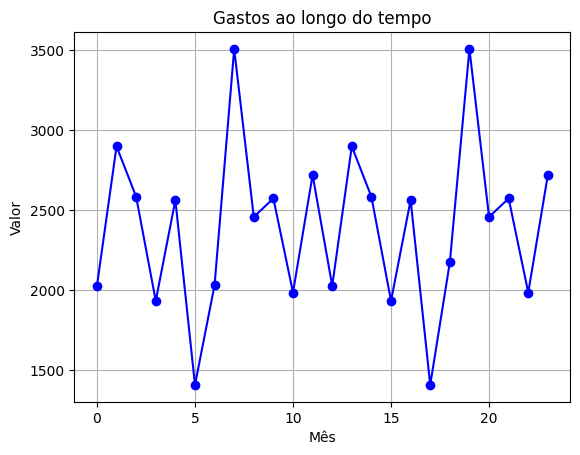

In [82]:
# Criar um gráfico de linhas
import matplotlib.pyplot as plt

plt.plot(lista_gastos_maria, marker='o', linestyle='-', color='b')
plt.title("Gastos ao longo do tempo")
plt.xlabel("Mês")
plt.ylabel("Valor")
plt.grid(True)

### Quanto a pergunta anterior, quem está gastando mais ao longo dos meses, o joão ou a maria?

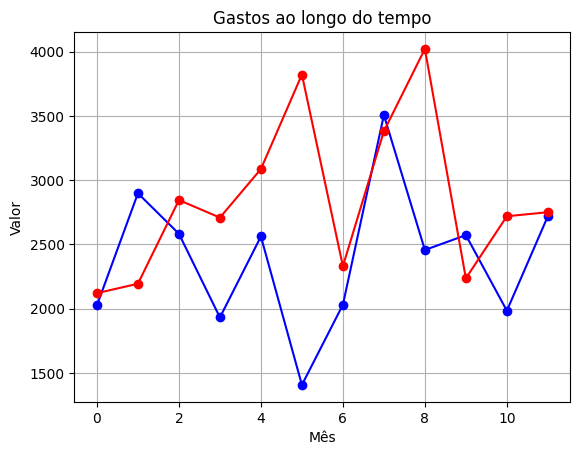

In [10]:
# Listar todos os gastos do João realizados em 2023:
lista_gastos_joao = []

for mes in range (1,13):

    tabela_filtrada = base_dados[
        (base_dados["Mês"] == mes) & 
        (base_dados["Ano"] == 2023) &
        (base_dados["Centro de Custo"] == "João") &
        (base_dados["Tipo"] == "Despesa")]

    lista_gastos_joao.append(tabela_filtrada['Valor'].sum())

# Colocar no gráfico criado as duas linhas para analisar a evolução de gastos de ambos
plt.plot(lista_gastos_maria, marker='o', linestyle='-', color='b')
plt.plot(lista_gastos_joao, marker='o', linestyle='-', color='r')
plt.title("Gastos ao longo do tempo")
plt.xlabel("Mês")
plt.ylabel("Valor")
plt.grid(True)

### Considerando o orçamento de ambos no mês de fevereiro de 2023, qual foi a porcentagem comprometida do orçamento em gastos?

In [11]:
# Filtrei os gastos do João pelo período que eu quero
tabela_filtrada_joao = base_dados[
    (base_dados["Mês"] == 2) & 
    (base_dados["Ano"] == 2023) &
    (base_dados["Centro de Custo"] == "João") &
    (base_dados["Tipo"] == "Despesa")]

# Filtrei os gastos da Maria pelo período que eu quero
tabela_filtrada_maria = base_dados[
    (base_dados["Mês"] == 2) & 
    (base_dados["Ano"] == 2023) &
    (base_dados["Centro de Custo"] == "Maria") &
    (base_dados["Tipo"] == "Despesa")]

In [12]:
# Somei por Categoria filtrando apenas o João pelo período que eu quero - no caso do João
tabela_filtrada_joao = tabela_filtrada_joao[['Categoria', 'Valor']].groupby("Categoria").sum().sort_values("Valor", ascending=False)
tabela_filtrada_joao

,Valor
Categoria,
Habitação,462.0
Despesas Financeiras,430.5
Alimentação,409.5
Transportes,304.5
Profissional,252.0
Outras Despesas,157.5
Saúde,157.5
Lazer,21.0


In [13]:
# Somei por Categoria filtrando apenas o João pelo período que eu quero - no caso do Maria
tabela_filtrada_maria = tabela_filtrada_maria[['Categoria', 'Valor']].groupby("Categoria").sum().sort_values("Valor", ascending=False)
tabela_filtrada_maria

,Valor
Categoria,
Saúde,525.0
Transportes,514.5
Despesas Financeiras,493.5
Habitação,283.5
Cuidados Pessoais,273.0
Profissional,262.5
Outras Despesas,189.0
Lazer,157.5
Alimentação,126.0


In [14]:
# Primeiro passo é transformar as tabelas em dicionários para que fique mais fácil iterar sobre ela:
dicionario_joao = tabela_filtrada_joao["Valor"].to_dict()
dicionario_maria = tabela_filtrada_maria["Valor"].to_dict()

# Depois eu crio um dicionário vazio para adicionar os elementos nele para transformar em tabela:
dict_gastos_joão = {}
dict_gastos_maria = {}

In [15]:
# Apurar a receita do João e da Maria:
receita_apurada_joao = base_dados[
    (base_dados["Mês"] == 2) & 
    (base_dados["Ano"] == 2023) &
    (base_dados["Centro de Custo"] == "João") &
    (base_dados["Tipo"] == "Receita")]

receita_apurada_joao = receita_apurada_joao['Valor'].sum()

receita_apurada_maria = base_dados[
    (base_dados["Mês"] == 2) & 
    (base_dados["Ano"] == 2023) &
    (base_dados["Centro de Custo"] == "Maria") &
    (base_dados["Tipo"] == "Receita")]

receita_apurada_maria = receita_apurada_maria['Valor'].sum()

In [16]:
for chaves, valores in dicionario_joao.items():
    valor_para_adicionar = f'{(valores / (receita_apurada_joao + receita_apurada_maria))*100:.2f}%'
    dict_gastos_joão.update({chaves: valor_para_adicionar})

for chaves, valores in dicionario_maria.items():
    valor_para_adicionar = f'{(valores / (receita_apurada_maria + receita_apurada_joao))*100:.2f}%'
    dict_gastos_maria.update({chaves: valor_para_adicionar})

In [17]:
tb_joao = pd.DataFrame.from_dict(dict_gastos_joão, orient='index', columns=['(%) João'])
tb_maria = pd.DataFrame.from_dict(dict_gastos_maria, orient='index', columns=['(%) Maria'])

tb_joao['(%) Maria'] = tb_maria['(%) Maria']
tb_joao

,(%) João,(%) Maria
Habitação,6.16%,3.78%
Despesas Financeiras,5.74%,6.58%
Alimentação,5.46%,1.68%
Transportes,4.06%,6.86%
Profissional,3.36%,3.50%
Outras Despesas,2.10%,2.52%
Saúde,2.10%,7.00%
Lazer,0.28%,2.10%


### Se a meta de guarda de cada um deles seja 500, em quais meses entre janeiro de 2023 a dezembro de 2024 foi cumprida?

In [19]:
lista_receitas_joao = []
lista_receitas_maria = []
lista_gastos_joao = []
lista_gastos_maria = []

# Aqui é o filtro para pegar o que eu quero
for ano in range(2023,2025):
    for mes in range (1,13):
        receita_mensal = base_dados['Valor'][
        (base_dados["Mês"] == mes) & 
        (base_dados["Ano"] == ano) &
        (base_dados["Centro de Custo"] == "João") &
        (base_dados["Tipo"] == "Receita")].sum()
        lista_receitas_joao.append(receita_mensal)

# Aqui é o filtro para pegar o que eu quero
for ano in range(2023,2025):
    for mes in range (1,13):
        gasto_mensal = base_dados['Valor'][
        (base_dados["Mês"] == mes) & 
        (base_dados["Ano"] == ano) &
        (base_dados["Centro de Custo"] == "Maria") &
        (base_dados["Tipo"] == "Receita")].sum()
        lista_receitas_maria.append(gasto_mensal)

for ano in range(2023,2025):
    for mes in range (1,13):
        receita_mensal = base_dados['Valor'][
        (base_dados["Mês"] == mes) & 
        (base_dados["Ano"] == ano) &
        (base_dados["Centro de Custo"] == "João") &
        (base_dados["Tipo"] == "Despesa")].sum()
        lista_gastos_joao.append(receita_mensal)

for ano in range(2023,2025):
    for mes in range (1,13):
        gasto_mensal = base_dados['Valor'][
        (base_dados["Mês"] == mes) & 
        (base_dados["Ano"] == ano) &
        (base_dados["Centro de Custo"] == "Maria") &
        (base_dados["Tipo"] == "Despesa")].sum()
        lista_gastos_maria.append(gasto_mensal)

In [73]:
saldos_joao = []
saldos_maria = []
meses = len(lista_gastos_joao)

for mes in range(0, meses):
    saldo_joao = lista_receitas_joao[mes] - lista_gastos_joao[mes]
    saldo_maria = lista_receitas_maria[mes] - lista_gastos_maria[mes]
    saldos_joao.append(saldo_joao)
    saldos_maria.append(saldo_maria)

In [62]:
# Finalmente, responder as perguntas para o caso do João:
periodo = []

for ano in range(2023, 2025):
    for mes in range(1,13):
        periodo.append(f'{mes}/{ano}')

for i, mes in enumerate(periodo):
    if saldos_joao[i] < 500:
        print(f'{mes} - R$ {saldos_joao[i]:.2f}')


9/2023 - R$ 478.50
9/2024 - R$ 478.50


In [74]:
# Finalmente, responder as perguntas para o caso do Maria:
periodo_maria = []

for ano in range(2023, 2025):
    for mes in range(1,13):
        periodo_maria.append(f'{mes}/{ano}')

for i, mes in enumerate(periodo_maria):
    if saldos_maria[i] < 500:
        print(f'{mes} - R$ {saldos_maria[i]:.2f}')


2/2023 - R$ 102.00
3/2023 - R$ 417.00
5/2023 - R$ 438.00
8/2023 - R$ -507.00
10/2023 - R$ 427.50
12/2023 - R$ 280.50
2/2024 - R$ 102.00
3/2024 - R$ 417.00
5/2024 - R$ 438.00
8/2024 - R$ -507.00
10/2024 - R$ 427.50
12/2024 - R$ 280.50
